In [1]:
#Ispired by https://shakasom.medium.com/routing-street-networks-find-your-way-with-python-9ba498147342 


In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import plotly_express as px
import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)

2021-12-29 14:15:53 Configured OSMnx 1.1.2
2021-12-29 14:15:53 HTTP response caching is on


In [33]:
def create_graph(loc, dist, transport_mode, loc_type="address"):
    """Transport mode = ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’"""
    if loc_type == "address":
            G = ox.graph_from_address(loc, dist=dist, network_type=transport_mode)
    elif loc_type == "points":
            G = ox.graph_from_point(loc, dist=dist, network_type=transport_mode )
    return G

2021-12-29 15:26:07 Retrieved response from cache file "cache/8e5a027a2984143208dddf7d9ae5149a307f3e65.json"
2021-12-29 15:26:07 Geocoded "Oslo" to (59.9133301, 10.7389701)
2021-12-29 15:26:07 Created bbox 2500 m from (59.9133301, 10.7389701): 59.93581310838733,59.89084709161268,10.783818663541325,10.694121536458674
2021-12-29 15:26:07 Projected GeoDataFrame to +proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-12-29 15:26:07 Projected GeoDataFrame to epsg:4326
2021-12-29 15:26:07 Projected GeoDataFrame to +proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-12-29 15:26:07 Projected GeoDataFrame to epsg:4326
2021-12-29 15:26:07 Requesting data within polygon from API in 1 request(s)
2021-12-29 15:26:07 Resolved overpass-api.de to 178.63.48.217
2021-12-29 15:26:07 Pausing 0 seconds before making HTTP POST request
2021-12-29 15:26:07 Post https://overpass-api.de/api/interpreter?data=%5Bout%3Ajson%5D%5Btimeout%3A180%5D%3B%28way%5B%22high

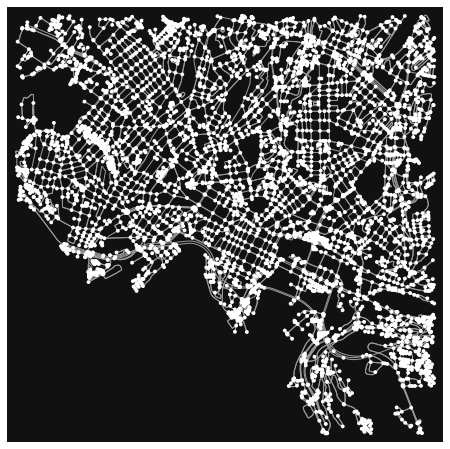

2021-12-29 15:26:22 Finished plotting the graph


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [46]:
G = create_graph("Oslo", 2500, "bike")
ox.plot_graph(G)

2021-12-29 15:33:49 Created edges GeoDataFrame from graph
2021-12-29 15:33:49 Created edges GeoDataFrame from graph
2021-12-29 15:33:49 Created nodes GeoDataFrame from graph
2021-12-29 15:33:49 Created nodes GeoDataFrame from graph
2021-12-29 15:33:49 Begin plotting the graph...


/Users/hakon/opt/anaconda3/envs/location-data-cleaner/lib/python3.10/site-packages/osmnx/distance.py:356: UserWarning:

The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.

/Users/hakon/opt/anaconda3/envs/location-data-cleaner/lib/python3.10/site-packages/osmnx/distance.py:356: UserWarning:

The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.



2021-12-29 15:33:50 Created edges GeoDataFrame from graph
2021-12-29 15:33:51 Finished plotting the graph


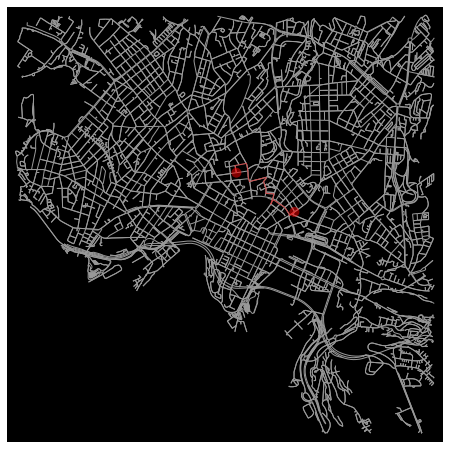

In [50]:
G = ox.add_edge_speeds(G) #Impute
G = ox.add_edge_travel_times(G) #Travel time
start = (59.91914, 10.74118 )
end = (59.91423, 10.75457 )
start_node = ox.get_nearest_node(G, start)
end_node = ox.get_nearest_node(G, end)
# Calculate the shortest path
route = nx.shortest_path(G, start_node, end_node, weight='travel_time')
#Plot the route and street networks
ox.plot_graph_route(G, route, route_linewidth=1, node_size=0, bgcolor='k');

In [29]:
route

[145173356,
 299734358,
 5061966869,
 301823631,
 145181102,
 299823745,
 60902851,
 299823840,
 60902857,
 60902859,
 60902887,
 1448664891,
 6883685425,
 1374702846,
 1739118998,
 9228282034,
 60911679,
 7373668,
 60911678,
 2487024336,
 2487024333,
 60786992,
 1374678095,
 7373669,
 60890012,
 25587532,
 1375971945,
 314452681]

2021-12-29 15:18:25 Begin plotting the graph...
2021-12-29 15:18:26 Created edges GeoDataFrame from graph
2021-12-29 15:18:27 Created nodes GeoDataFrame from graph
2021-12-29 15:18:28 Finished plotting the graph


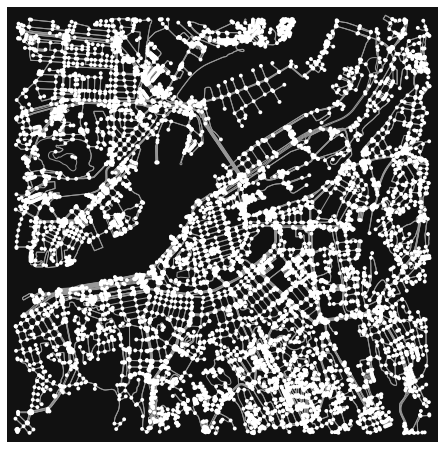

2021-12-29 15:19:40 Begin plotting the graph...
2021-12-29 15:19:41 Created edges GeoDataFrame from graph
2021-12-29 15:19:42 Created nodes GeoDataFrame from graph
2021-12-29 15:19:43 Finished plotting the graph


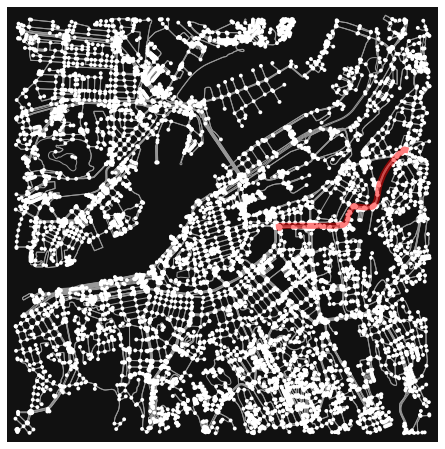

In [45]:
# plot the graph but not the route, and override any user show/close
# args for now: we'll do that later
fig, ax = ox.plot_graph(G, show=False, save=False, close=False)# assemble the route edge geometries' x and y coords then plot the line
x = []
y = []
for u, v in zip(route[:-1], route[1:]):
    # if there are parallel edges, select the shortest in length
    data = min(G.get_edge_data(u, v).values(), key=lambda d: d["length"])
    if "geometry" in data:
        # if geometry attribute exists, add all its coords to list
        xs, ys = data["geometry"].xy
        x.extend(xs)
        y.extend(ys)
    else:
        # otherwise, the edge is a straight line from node to node
        x.extend((G.nodes[u]["x"], G.nodes[v]["x"]))
        y.extend((G.nodes[u]["y"], G.nodes[v]["y"]))
ax.plot(x, y, c='red', lw=6, alpha=0.5)